# Record the thing I don't know

In [154]:
import numpy as np
import pandas as pd
from sklearn import datasets

# load iris data
iris = datasets.load_iris()
dat_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']]
                        , columns= iris['feature_names'] + ['target'])
dat_iris['target'] = dat_iris['target'].astype(object)

# import college_clean data
dat_cc = pd.read_csv('/Users/dazzle/Documents/DHmeeting/data/college_clean.csv'
                 , index_col=0)

# Matplotlib.pyplot

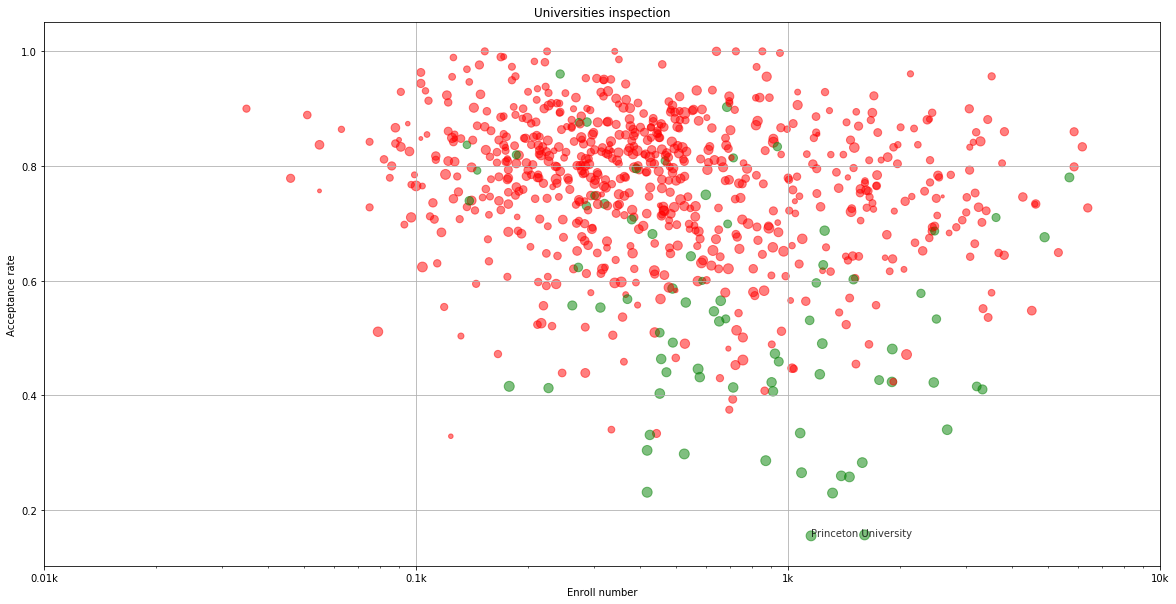

In [114]:
import matplotlib.pyplot as plt

# customize figure size
plt.figure(figsize=(20,10))

# Scatter plot
plt.scatter(x='Enroll', y='accept_rate', data=dat_cc
            , s='Grad.Rate', alpha=0.5
            , c=dat_cc['isElite'].map({'Not Elite':'red', 'Elite':'green'}))

# customize axis
plt.xscale('log')
plt.xlabel('Enroll number')
plt.ylabel('Acceptance rate')
plt.title('Universities inspection')
plt.xticks([10, 100, 1000, 10000], ['0.01k', '0.1k', '1k', '10k'])

# Additional customize
plt.text(x=dat_cc['Enroll'][459], y=dat_cc['accept_rate'][459], s=dat_cc.index[459], alpha=0.8)
plt.grid(True)

# show the plot
plt.show()

# Scale functions

In [180]:
# scale every feature into N(0, 1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# scale every observation into N(0, 1)
from sklearn.preprocessing import Normalizer
scale = Normalizer()

# Unsupervised learning

## KMeans from sklearn

target  0.0  1.0  2.0
row_0                
0         1   36   19
1         0   13   31
2        49    1    0


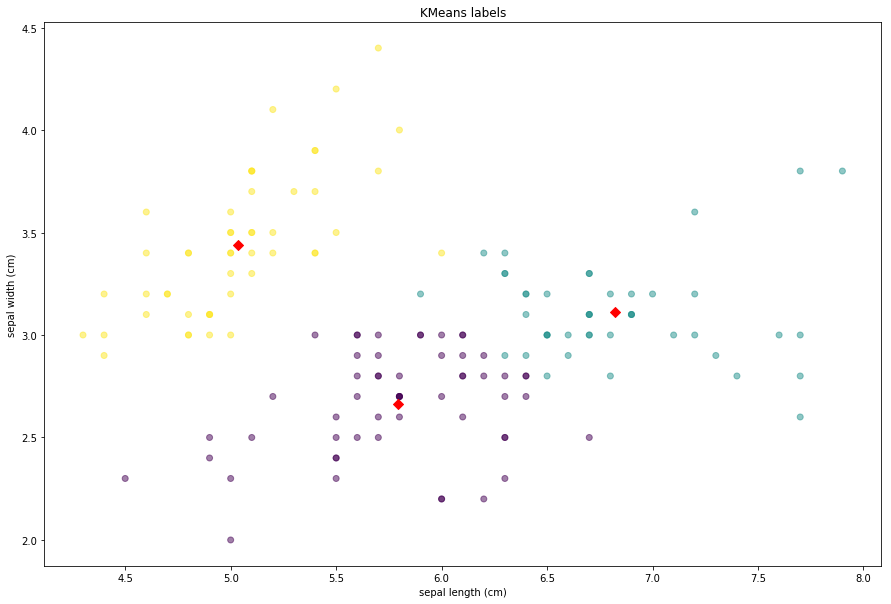

In [178]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat = scaler.fit_transform(dat_iris[['sepal length (cm)', 'sepal width (cm)']])

# model fitting
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(dat)

# results evaluation
print(pd.crosstab(labels, dat_iris['target']))

# inverse-standardize cluster centers 
centers = scaler.inverse_transform(model.cluster_centers_)

# labels plotting
plt.figure(figsize=(15,10))
plt.scatter(x=dat_iris['sepal length (cm)'], y=dat_iris['sepal width (cm)']
            , c=labels, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], marker='D', s=50, c='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans labels')
plt.show()